In [64]:
from scipy.ndimage import label
def is_broken(mask):
    labeled_array, num_features = label(mask==255)
    if num_features <= 1:
        return False
    total_area = np.sum(mask==255)
    largest_area = 0
    for i in range(1, num_features+1):
        area = np.sum(labeled_array==i)
        if area > largest_area:
            largest_area = area
    if largest_area / total_area < 0.8:
        return True
    return False

In [2]:
import os

p_train = "/data/chaksu/Train"
p_test = "/data/chaksu/Test"

#create a dict with d[folder_name][sub_folder_name] = len(files in sub_folder_name)
data_dict_train = {}
for folder_name in os.listdir(p_train):
    folder_path = os.path.join(p_train, folder_name)
    if os.path.isdir(folder_path):
        data_dict_train[folder_name] = {}
        for sub_folder_name in os.listdir(folder_path):
            sub_folder_path = os.path.join(folder_path, sub_folder_name)
            if os.path.isdir(sub_folder_path):
                num_files = len(os.listdir(sub_folder_path))
                data_dict_train[folder_name][sub_folder_name] = num_files
data_dict_test = {}
for folder_name in os.listdir(p_test):
    folder_path = os.path.join(p_test, folder_name)
    if os.path.isdir(folder_path):
        data_dict_test[folder_name] = {}
        for sub_folder_name in os.listdir(folder_path):
            sub_folder_path = os.path.join(folder_path, sub_folder_name)
            if os.path.isdir(sub_folder_path):
                num_files = len(os.listdir(sub_folder_path))
                data_dict_test[folder_name][sub_folder_name] = num_files
print("Train data distribution:")
for folder_name, sub_folders in data_dict_train.items():
    print(f"Folder: {folder_name}")
    for sub_folder_name, num_files in sub_folders.items():
        print(f"  Sub-folder: {sub_folder_name}, Number of files: {num_files}")
print("\nTest data distribution:")
for folder_name, sub_folders in data_dict_test.items():
    print(f"Folder: {folder_name}")
    for sub_folder_name, num_files in sub_folders.items():
        print(f"  Sub-folder: {sub_folder_name}, Number of files: {num_files}")

Train data distribution:
Folder: 2.0_Doctors_Annotations
  Sub-folder: Expert 2, Number of files: 4
  Sub-folder: Expert 5, Number of files: 4
  Sub-folder: Expert 4, Number of files: 4
  Sub-folder: Expert 3, Number of files: 3
  Sub-folder: Expert 1, Number of files: 4
Folder: 3.0_Doctors_Annotations_Binary_OD_OC
  Sub-folder: Expert 2, Number of files: 4
  Sub-folder: Expert 5, Number of files: 4
  Sub-folder: Expert 4, Number of files: 4
  Sub-folder: Expert 3, Number of files: 4
  Sub-folder: Expert 1, Number of files: 4
Folder: 4.0_OD_CO_Fusion_Images
  Sub-folder: Expert 2, Number of files: 4
  Sub-folder: Expert 5, Number of files: 4
  Sub-folder: Expert 4, Number of files: 4
  Sub-folder: Expert 3, Number of files: 4
  Sub-folder: Forus, Number of files: 5
  Sub-folder: Remidio, Number of files: 5
  Sub-folder: Expert 1, Number of files: 4
  Sub-folder: Bosch, Number of files: 5
Folder: 5.0_OD_OC_Mean_Median_Majority_STAPLE
  Sub-folder: Forus, Number of files: 3
  Sub-folder:

In [70]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import tqdm
import numpy as np
p = "/data/chaksu/Train/3.0_Doctors_Annotations_Binary_OD_OC"
broken_images = {"machine": [],"expert_name": [],"file_name": [],"cup": [],"disc": []}
machines = ["Bosch","Forus","Remidio"]
for expert_name in os.listdir(p):
    if not "Expert" in expert_name:
        continue
    for machine in machines:
        files = os.listdir(os.path.join(p, expert_name, machine, "Cup"))
        for f in tqdm.tqdm(files):
            if not f.endswith(".png"):
                continue
            cup = np.array(Image.open(os.path.join(p, expert_name, machine, "Cup", f)))
            disc = np.array(Image.open(os.path.join(p, expert_name, machine, "Disc", f)))
            if cup.ndim==3:
                cup = cup[:,:,0]
            if disc.ndim==3:
                disc = disc[:,:,0]
            #assert all pixels in cup are also in disc
            if not np.all((cup == 255) <= (disc == 255)):
                print(f"Error in {expert_name}/{machine}/{f}")
                broken_images["machine"].append(machine)
                broken_images["expert_name"].append(expert_name)
                broken_images["file_name"].append(f)
                broken_images["cup"].append(cup)
                broken_images["disc"].append(disc)

100%|██████████| 105/105 [00:01<00:00, 101.03it/s]


Error in Expert 2/Bosch/Image145.png


 19%|█▉        | 153/811 [00:04<00:20, 32.46it/s]

Error in Expert 2/Remidio/IMG_2702.png


 29%|██▉       | 237/811 [00:07<00:17, 33.62it/s]

Error in Expert 2/Remidio/IMG_3533.png


 22%|██▏       | 23/105 [00:00<00:00, 107.24it/s]

Error in Expert 5/Bosch/Image142.png
Error in Expert 5/Bosch/P5_Image2.png
Error in Expert 5/Bosch/Image118.png


 43%|████▎     | 45/105 [00:00<00:00, 103.89it/s]

Error in Expert 5/Bosch/Image134.png


100%|██████████| 105/105 [00:01<00:00, 102.43it/s]


Error in Expert 5/Bosch/P3_Image2.png
Error in Expert 5/Bosch/Image187.png
Error in Expert 5/Bosch/Image179.png


  0%|          | 0/96 [00:00<?, ?it/s]

Error in Expert 5/Forus/62.png


 21%|██        | 20/96 [00:00<00:00, 91.25it/s]

Error in Expert 5/Forus/63.png


 41%|████      | 39/96 [00:00<00:00, 89.10it/s]

Error in Expert 5/Forus/93.png
Error in Expert 5/Forus/85.png
Error in Expert 5/Forus/5.png


 69%|██████▉   | 66/96 [00:00<00:00, 87.14it/s]

Error in Expert 5/Forus/7.png
Error in Expert 5/Forus/26.png
Error in Expert 5/Forus/27.png
Error in Expert 5/Forus/31.png
Error in Expert 5/Forus/34.png
Error in Expert 5/Forus/20.png


 88%|████████▊ | 84/96 [00:00<00:00, 87.16it/s]

Error in Expert 5/Forus/23.png
Error in Expert 5/Forus/38.png


 25%|██▌       | 204/810 [00:05<00:17, 33.80it/s]

Error in Expert 5/Remidio/IMG_3446.png


 44%|████▍     | 360/810 [00:10<00:13, 33.82it/s]

Error in Expert 5/Remidio/IMG_3442.png


 56%|█████▌    | 452/810 [00:13<00:10, 34.48it/s]

Error in Expert 5/Remidio/IMG_2550.png


 82%|████████▏ | 668/810 [00:19<00:04, 34.33it/s]

Error in Expert 5/Remidio/IMG_3348.png


 98%|█████████▊| 796/810 [00:23<00:00, 33.46it/s]

Error in Expert 5/Remidio/IMG_2698.png
Error in Expert 5/Remidio/IMG_3431.png


100%|██████████| 810/810 [00:23<00:00, 34.06it/s]


Error in Expert 5/Remidio/IMG_2505.png


 32%|███▏      | 34/105 [00:00<00:00, 104.44it/s]

Error in Expert 4/Bosch/P2_Image1.png
Error in Expert 4/Bosch/Image119.png
Error in Expert 4/Bosch/Image135.png


 54%|█████▍    | 436/810 [00:13<00:11, 33.12it/s]

Error in Expert 4/Remidio/IMG_2801.png


 21%|██        | 22/105 [00:00<00:00, 105.43it/s]

Error in Expert 3/Bosch/Image153.png
Error in Expert 3/Bosch/Image154.png


 31%|███▏      | 33/105 [00:00<00:00, 102.31it/s]

Error in Expert 3/Bosch/Image132.png


 94%|█████████▍| 99/105 [00:00<00:00, 100.50it/s]

Error in Expert 3/Bosch/Image162.png


 35%|███▌      | 284/810 [00:08<00:15, 33.46it/s]

Error in Expert 3/Remidio/IMG_3534.png


 47%|████▋     | 384/810 [00:11<00:12, 33.64it/s]

Error in Expert 3/Remidio/IMG_2802.png


 50%|█████     | 408/810 [00:12<00:11, 34.28it/s]

Error in Expert 3/Remidio/IMG_2546.png


 54%|█████▍    | 436/810 [00:13<00:11, 33.78it/s]

Error in Expert 3/Remidio/IMG_2801.png


 56%|█████▌    | 452/810 [00:13<00:10, 33.62it/s]

Error in Expert 3/Remidio/IMG_2544.png


 57%|█████▋    | 460/810 [00:13<00:10, 33.73it/s]

Error in Expert 3/Remidio/IMG_2545.png


 63%|██████▎   | 512/810 [00:15<00:08, 34.21it/s]

Error in Expert 3/Remidio/IMG_2540.png


 69%|██████▊   | 556/810 [00:16<00:07, 34.23it/s]

Error in Expert 3/Remidio/IMG_2542.png
Error in Expert 3/Remidio/IMG_2543.png


 21%|██        | 22/105 [00:00<00:00, 106.16it/s]

Error in Expert 1/Bosch/Image142.png
Error in Expert 1/Bosch/P5_Image2.png
Error in Expert 1/Bosch/Image118.png


 42%|████▏     | 44/105 [00:00<00:00, 102.02it/s]

Error in Expert 1/Bosch/Image134.png


100%|██████████| 105/105 [00:01<00:00, 98.68it/s]


Error in Expert 1/Bosch/P3_Image2.png
Error in Expert 1/Bosch/Image187.png
Error in Expert 1/Bosch/Image179.png


  0%|          | 0/96 [00:00<?, ?it/s]

Error in Expert 1/Forus/62.png


 21%|██        | 20/96 [00:00<00:00, 85.62it/s]

Error in Expert 1/Forus/63.png


 40%|███▉      | 38/96 [00:00<00:00, 83.82it/s]

Error in Expert 1/Forus/93.png
Error in Expert 1/Forus/85.png
Error in Expert 1/Forus/5.png


 68%|██████▊   | 65/96 [00:00<00:00, 82.61it/s]

Error in Expert 1/Forus/7.png
Error in Expert 1/Forus/26.png
Error in Expert 1/Forus/27.png
Error in Expert 1/Forus/31.png
Error in Expert 1/Forus/34.png
Error in Expert 1/Forus/20.png


 86%|████████▋ | 83/96 [00:00<00:00, 83.76it/s]

Error in Expert 1/Forus/23.png
Error in Expert 1/Forus/38.png


 98%|█████████▊| 797/811 [00:23<00:00, 33.54it/s]

Error in Expert 1/Remidio/IMG_2698.png


100%|██████████| 811/811 [00:24<00:00, 33.68it/s]


(array([ 3.,  0., 27.,  0.,  0.,  4.,  0., 13.,  0., 21.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

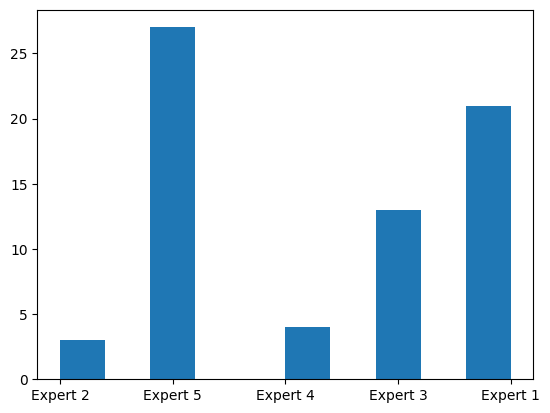

In [18]:
plt.hist(broken_images["expert_name"])

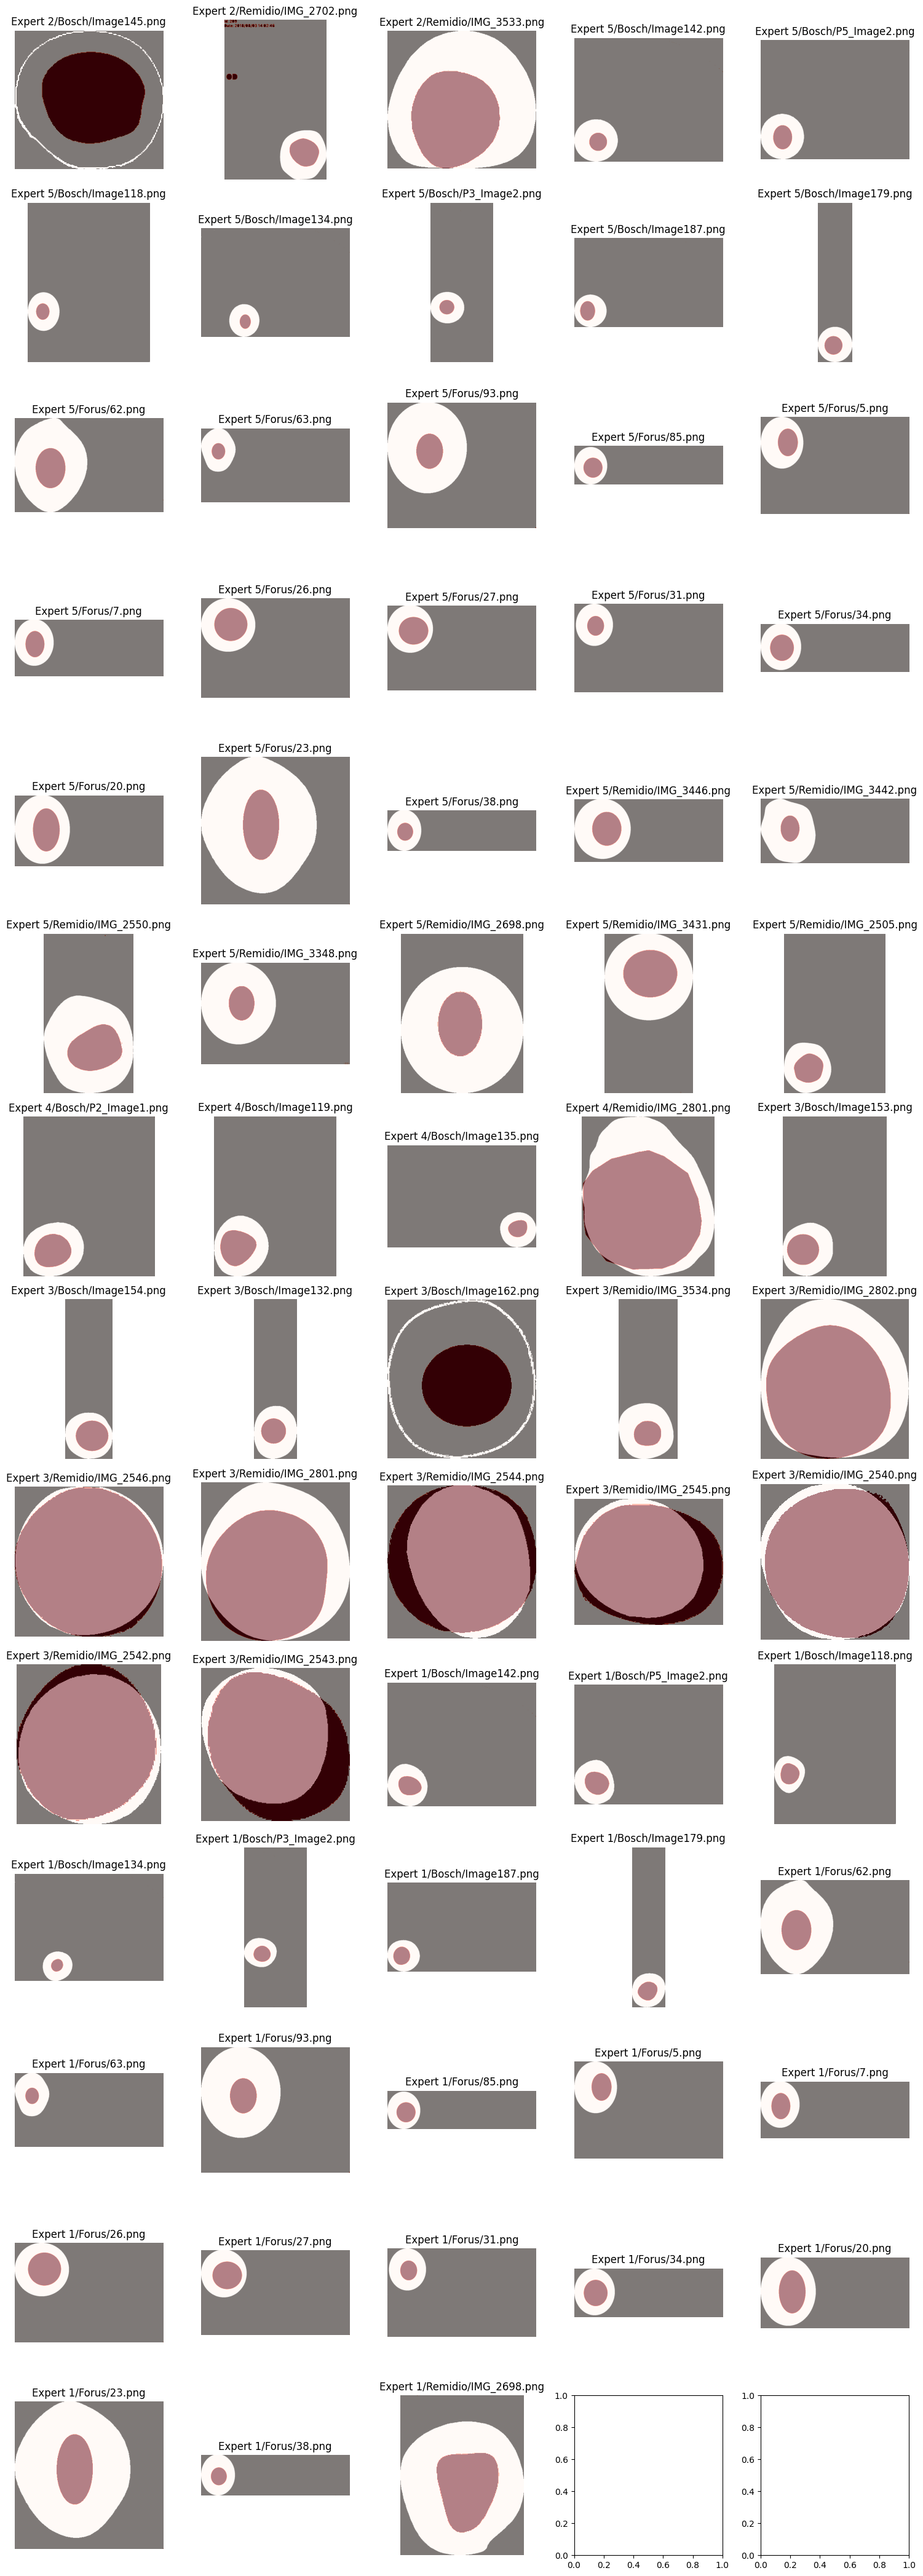

In [71]:
#show nonzero crop of all images

n_images = len(broken_images["cup"])
n_cols = 5
n_rows = (n_images + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
for i in range(n_images):
    cup = broken_images["cup"][i]
    disc = broken_images["disc"][i]
    #get nonzero crop
    ys, xs = np.nonzero(disc)
    y_min, y_max = ys.min(), ys.max()
    x_min, x_max = xs.min(), xs.max()
    ys, xs = np.nonzero(cup)
    y_min_cup, y_max_cup = ys.min(), ys.max()
    x_min_cup, x_max_cup = xs.min(), xs.max()
    y_min = min(y_min, y_min_cup)
    y_max = max(y_max, y_max_cup)
    x_min = min(x_min, x_min_cup)
    x_max = max(x_max, x_max_cup)
    cup = cup[y_min:y_max+1, x_min:x_max+1]
    disc = disc[y_min:y_max+1, x_min:x_max+1]
    if n_rows == 1:
        ax = axes[i % n_cols]
    else:
        ax = axes[i // n_cols, i % n_cols]
    ax.imshow(disc, cmap="gray")
    ax.imshow(cup, cmap="Reds", alpha=0.5)
    ax.set_title(f"{broken_images['expert_name'][i]}/{broken_images['machine'][i]}/{broken_images['file_name'][i]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [66]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import tqdm
import numpy as np
p = "/data/chaksu/Train/3.0_Doctors_Annotations_Binary_OD_OC"
broken_images = {"machine": [],"expert_name": [],"file_name": [],"cup": [],"disc": []}
machines = ["Bosch","Forus","Remidio"]
for expert_name in os.listdir(p):
    if not "Expert" in expert_name:
        continue
    for machine in machines:
        files = os.listdir(os.path.join(p, expert_name, machine, "Cup"))
        for f in tqdm.tqdm(files):
            if not f.endswith(".png"):
                continue
            cup = np.array(Image.open(os.path.join(p, expert_name, machine, "Cup", f)))
            disc = np.array(Image.open(os.path.join(p, expert_name, machine, "Disc", f)))
            if cup.ndim==3:
                cup = cup[:,:,0]
            if disc.ndim==3:
                disc = disc[:,:,0]
            # if image contains more than 1 connected component in cup or disc, and the largest component is less than 80% of the total area, mark as broken
            criterion_met = is_broken(cup) or is_broken(disc)
            if criterion_met:
                print(f"Error in {expert_name}/{machine}/{f}")
                broken_images["machine"].append(machine)
                broken_images["expert_name"].append(expert_name)
                broken_images["file_name"].append(f)
                broken_images["cup"].append(cup)
                broken_images["disc"].append(disc)

100%|██████████| 105/105 [00:02<00:00, 45.88it/s]


Error in Expert 2/Bosch/Image145.png


 87%|████████▋ | 91/105 [00:01<00:00, 46.00it/s]

Error in Expert 3/Bosch/Image162.png


100%|██████████| 811/811 [00:58<00:00, 13.85it/s]


In [67]:
cup.max(), disc.max()


(255, 255)

In [65]:
image_sizes = {"Bosch": set(), "Forus": set(), "Remidio": set()}
p = "/data/chaksu/Train/1.0_Original_Fundus_Images"
circle_widths = {"Bosch": 1440, "Forus": 1900, "Remidio": 2200}
for machine in image_sizes.keys():
    machine_path = os.path.join(p, machine)
    for file_name in os.listdir(machine_path):
        if not (file_name.endswith(".jpg") or file_name.endswith(".png")):
            continue
        image_path = os.path.join(machine_path, file_name)
        image = Image.open(image_path)
        image_sizes[machine].add(image.size)
print(image_sizes)

{'Bosch': {(1920, 1440)}, 'Forus': {(2048, 1536)}, 'Remidio': {(2448, 3264)}}


In [72]:
circle_widths = {"Bosch": 1440, "Forus": 1900, "Remidio": 2200}
bbox_sizes = {"Bosch": [], "Forus": [], "Remidio": []}
p = "/data/chaksu/Train/3.0_Doctors_Annotations_Binary_OD_OC"
for expert_name in os.listdir(p):
    if not "Expert" in expert_name:
        continue
    for machine, sizes in image_sizes.items():
        #load all files and save bounding box sizes
        files = os.listdir(os.path.join(p, expert_name, machine, "Disc"))
        for f in tqdm.tqdm(files):
            if not f.endswith(".png"):
                continue
            disc = np.array(Image.open(os.path.join(p, expert_name, machine, "Disc", f)))
            if disc.ndim==3:
                disc = disc[:,:,0]
            ys, xs = np.nonzero(disc)
            y_min, y_max = ys.min(), ys.max()
            x_min, x_max = xs.min(), xs.max()
            bbox_height = y_max - y_min + 1
            bbox_width = x_max - x_min + 1
            bbox_sizes[machine].append((bbox_width, bbox_height))


100%|██████████| 811/811 [00:26<00:00, 30.49it/s]


Bosch median bbox size: (0.1486111111111111, 0.15763888888888888)
Forus median bbox size: (0.16105263157894736, 0.18)
Remidio median bbox size: (0.1859090909090909, 0.1990909090909091)


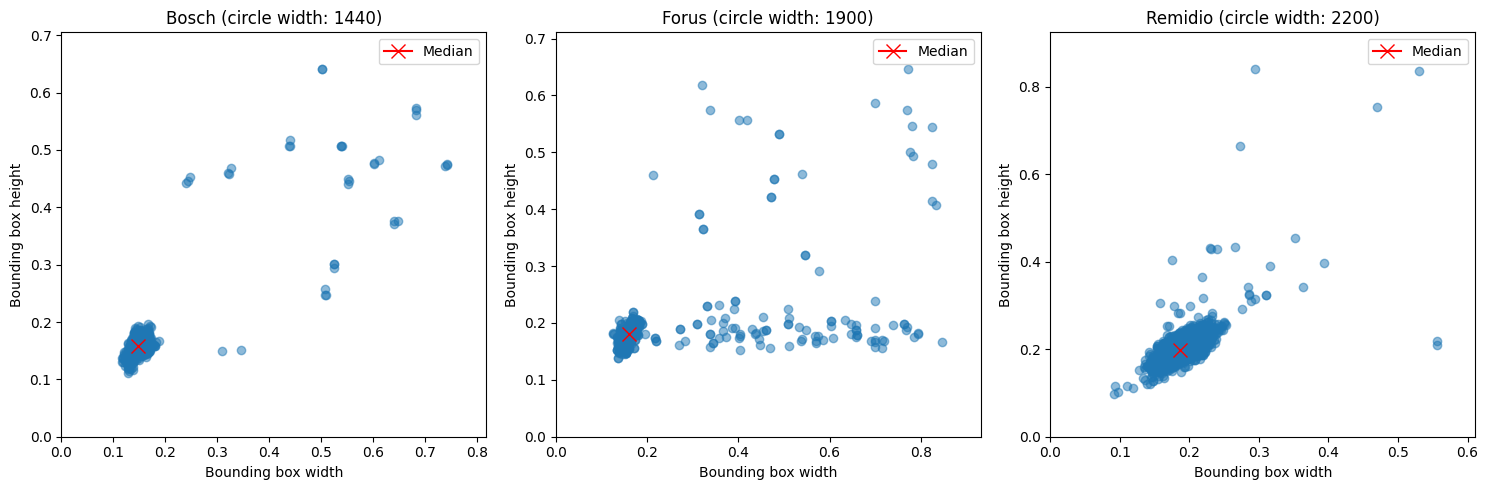

In [87]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
normalize = True
medians = []
for i,(machine,sizes) in enumerate(bbox_sizes.items()):
    n = circle_widths[machine] if normalize else 1
    widths = [s[0]/n for s in sizes]
    heights = [s[1]/n for s in sizes]
    axes[i].scatter(widths, heights, alpha=0.5)
    axes[i].set_title(f"{machine} (circle width: {circle_widths[machine]})")
    axes[i].set_xlabel("Bounding box width")
    axes[i].set_ylabel("Bounding box height")
    axes[i].set_xlim(0, max(widths)*1.1)
    axes[i].set_ylim(0, max(heights)*1.1)
    median_x = np.median(widths)
    median_y = np.median(heights)
    medians.append((median_x, median_y))
    axes[i].plot(median_x, median_y, color="red", marker="x", markersize=10, label="Median")
    print(f"{machine} median bbox size: ({median_x}, {median_y})")
    axes[i].legend()
medians = np.array(medians)
plt.tight_layout()
plt.show()

In [ ]:
import os
n_images = {"Bosch_test": 0, "Forus_test": 0, "Remidio_test": 0,
            "Bosch_train": 0, "Forus_train": 0, "Remidio_train": 0}
p_train = "/data/chaksu/Train/1.0_Original_Fundus_Images"
p_test = "/data/chaksu/Test/1.0_Original_Fundus_Images"
valid_endings = [".jpg", ".png", ".jpeg", ".JPG", ".PNG", ".JPEG"]
for it in n_images.keys():
    machine, split = it.split("_")
    p = p_train if split=="train" else p_test
    machine_path = os.path.join(p, machine)
    for file_name in os.listdir(machine_path):
        if any(file_name.endswith(ext) for ext in valid_endings):
            n_images[it] += 1
print(n_images)
total = sum(n_images.values())

{'Bosch_test': 41, 'Forus_test': 31, 'Remidio_test': 264, 'Bosch_train': 104, 'Forus_train': 95, 'Remidio_train': 810}


In [ ]:
os.listdir

'/data/chaksu/Train/1.0_Original_Fundus_Images/Remidio'